Praktek TF-IDF
=============================

In [1]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('../dataset/clean_dataset_stem.csv',sep=';')

In [4]:
dataset.shape

(902, 10)

In [5]:
dataset.head(3)

,Unnamed: 0.1,Unnamed: 0,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...


In [6]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [7]:
dataset_feature

0      cegah mata rantai covid kita rumah hingga hari...
1      aku mohon yaallah moga wabah covid hilang rama...
2      pemprov papua naik status jadi tanggap darurat...
3                      covid nyampe prigen mbak hmm hoax
4      nyuruh orang pintar lu aja togog kerumun orang...
                             ...                        
897    seluruh negara dunia alami masa sulit covid ra...
898    covid skripsi disaster selesai mau bgt bljr ma...
899    malam projek benda bincang malam fb satu belia...
900                          pontang panting koyak covid
901    masalah sekarang isu jangkit covid alaaaa bosa...
Name: ProcessedText, Length: 902, dtype: object

In [8]:
dataset_label = dataset['Sentimen']

In [9]:
dataset_label

0      1.0
1      1.0
2      1.0
3      0.0
4     -1.0
      ... 
897    1.0
898    1.0
899    0.0
900   -1.0
901   -1.0
Name: Sentimen, Length: 902, dtype: float64

# cek distribusi label

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\MMurt\AppData\Local\Temp\ipykernel_26852\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


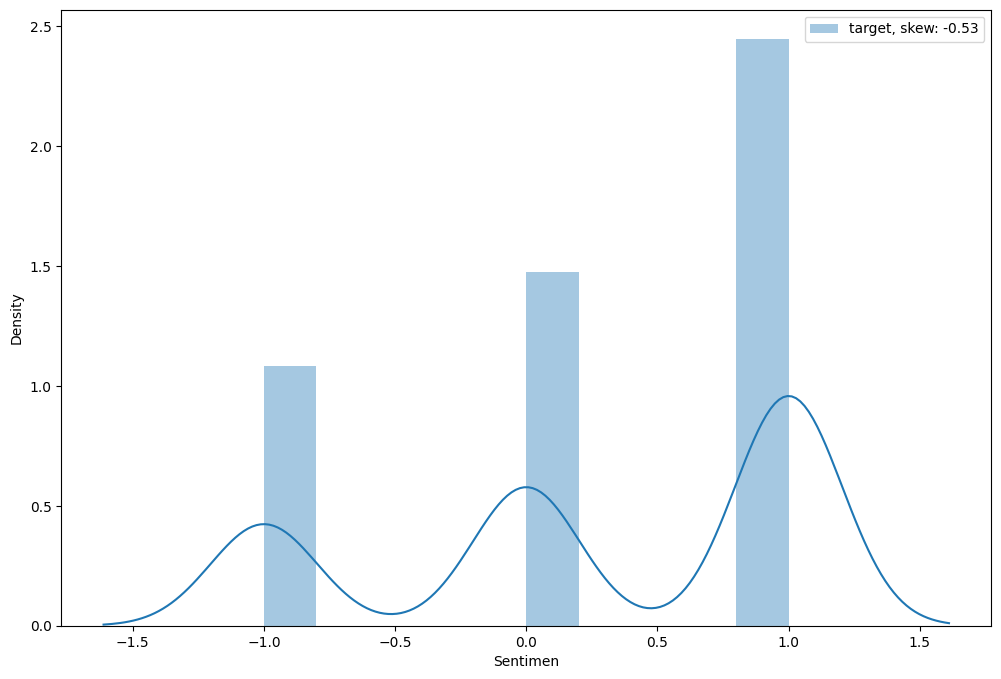

In [11]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [12]:
dataset_label.value_counts()

Sentimen
 1.0    441
 0.0    266
-1.0    195
Name: count, dtype: int64

# TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
vectorizer = TfidfVectorizer()

In [15]:
positive_reviews = dataset[(dataset["Sentimen"] == 1)]
negative_reviews = dataset[(dataset["Sentimen"] == -1)]
neutral_reviews = dataset[(dataset["Sentimen"] == 0)]

In [16]:
positive_reviews.head()

,Unnamed: 0.1,Unnamed: 0,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
6,6,6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",1.0,selamat pagi hari jumat jumat keempat di kala ...,"['selamat', 'pagi', 'hari', 'jumat', 'jumat', ...","['selamat', 'pagi', 'hari', 'jumat', 'jumat', ...",selamat pagi hari jumat jumat keempat di kala ...,selamat pagi hari jumat jumat keempat di kala ...,selamat pagi hari jumat jumat empat kala pande...
7,7,7,"Hikmah di balik musibah covid-19, smg para pej...",1.0,hikmah di balik musibah covid smg para pejab...,"['hikmah', 'di', 'balik', 'musibah', 'covid', ...","['hikmah', 'di', 'balik', 'musibah', 'covid', ...",hikmah di balik musibah covid smg para pejabat...,hikmah di balik musibah covid smg para pejabat...,hikmah balik musibah covid smg jabat perintah ...


### TF-IDF untuk POSITIVE

In [17]:
Positive_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_tf_idf = Positive_tf_idf_vect.fit_transform(positive_reviews["ProcessedText"].values)

Positive_tf_idf.shape

(441, 7781)

In [18]:
features_pos = Positive_tf_idf_vect.get_feature_names_out()
idfValues_pos = Positive_tf_idf_vect.idf_

d_pos = dict(zip(features_pos, 9 - idfValues_pos))
sortedDict_pos = sorted(d_pos.items(), key=lambda x: x[1], reverse=True)

for i in range(200):
    print(sortedDict_pos[i])

('covid', np.float64(7.97247532660991))
('virus', np.float64(6.083077387817939))
('cegah', np.float64(6.067573201281974))
('sebar', np.float64(6.0195639820956135))
('corona', np.float64(5.934041808657451))
('moga', np.float64(5.878982031474424))
('sama', np.float64(5.878982031474424))
('rumah', np.float64(5.737331514411396))
('yg', np.float64(5.737331514411396))
('wabah', np.float64(5.669890233615864))
('semua', np.float64(5.597569572036238))
('masyarakat', np.float64(5.464038179411716))
('perintah', np.float64(5.464038179411716))
('sehat', np.float64(5.464038179411716))
('tangan', np.float64(5.464038179411716))
('jaga', np.float64(5.405197679388782))
('bantu', np.float64(5.342677322407448))
('virus corona', np.float64(5.342677322407448))
('indonesia', np.float64(5.309887499584457))
('laku', np.float64(5.309887499584457))
('satu', np.float64(5.309887499584457))
('segera', np.float64(5.309887499584457))
('wabah covid', np.float64(5.309887499584457))
('beri', np.float64(5.275985947908776

### TF-IDF untuk NEUTRAL

In [19]:
Neutral_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Neutral_tf_idf = Neutral_tf_idf_vect.fit_transform(
    neutral_reviews["ProcessedText"].values
)

Neutral_tf_idf.shape

(266, 5154)

In [20]:
features_neu = Neutral_tf_idf_vect.get_feature_names_out()
idfValues_neu = Neutral_tf_idf_vect.idf_

d_neu = dict(zip(features_neu, 9 - idfValues_neu))
sortedDict_neu = sorted(d_neu.items(), key=lambda x: x[1], reverse=True)

for i in range(200):
    print(sortedDict_neu[i])


('covid', np.float64(7.96182742649497))
('yg', np.float64(6.101630795713687))
('orang', np.float64(5.5908051719476966))
('positif', np.float64(5.5482455575289))
('date', np.float64(5.408483615153742))
('hari', np.float64(5.408483615153742))
('indonesia', np.float64(5.3571903207661915))
('ni', np.float64(5.3571903207661915))
('ada', np.float64(5.303123099495915))
('mau', np.float64(5.303123099495915))
('pasien', np.float64(5.303123099495915))
('baru', np.float64(5.2459646856559665))
('jadi', np.float64(5.2459646856559665))
('virus', np.float64(5.2459646856559665))
('banyak', np.float64(5.185340063839531))
('lebih', np.float64(5.185340063839531))
('kasus', np.float64(5.12080154270196))
('positif covid', np.float64(5.12080154270196))
('tinggal', np.float64(5.12080154270196))
('kena', np.float64(5.051808671215009))
('pandemi', np.float64(5.051808671215009))
('update', np.float64(5.051808671215009))
('apa', np.float64(4.9777006990612875))
('rumah', np.float64(4.9777006990612875))
('buat', n

### TF-IDF untuk NEGATIVE

In [21]:
Negative_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Negative_tf_idf = Negative_tf_idf_vect.fit_transform(
    negative_reviews["ProcessedText"].values
)

Negative_tf_idf.shape

(195, 4174)

In [22]:
features_neg = Negative_tf_idf_vect.get_feature_names_out()
idfValues_neg = Negative_tf_idf_vect.idf_

d_neg = dict(zip(features_neg, 9 - idfValues_neg))
sortedDict_neg = sorted(d_neg.items(), key=lambda x: x[1], reverse=True)

for i in range(200):
    print(sortedDict_neg[i])


('covid', np.float64(7.963632355829125))
('yg', np.float64(6.593086351677374))
('jadi', np.float64(5.940761165637683))
('orang', np.float64(5.8999391711174285))
('semua', np.float64(5.717617614323474))
('bukan', np.float64(5.666324319935923))
('kena', np.float64(5.612257098665648))
('jenazah', np.float64(5.555098684825699))
('mau', np.float64(5.555098684825699))
('sama', np.float64(5.494474063009264))
('tinggal', np.float64(5.494474063009264))
('virus', np.float64(5.494474063009264))
('mati', np.float64(5.360942670384741))
('rumah', np.float64(5.360942670384741))
('tolak', np.float64(5.360942670384741))
('aja', np.float64(5.2868346982310195))
('apa', np.float64(5.2868346982310195))
('buat', np.float64(5.2868346982310195))
('ga', np.float64(5.2868346982310195))
('kalo', np.float64(5.206791990557483))
('lebih', np.float64(5.206791990557483))
('pandemi', np.float64(5.206791990557483))
('tak', np.float64(5.206791990557483))
('corona', np.float64(5.119780613567853))
('lama', np.float64(5.11

In [23]:
!pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [25]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

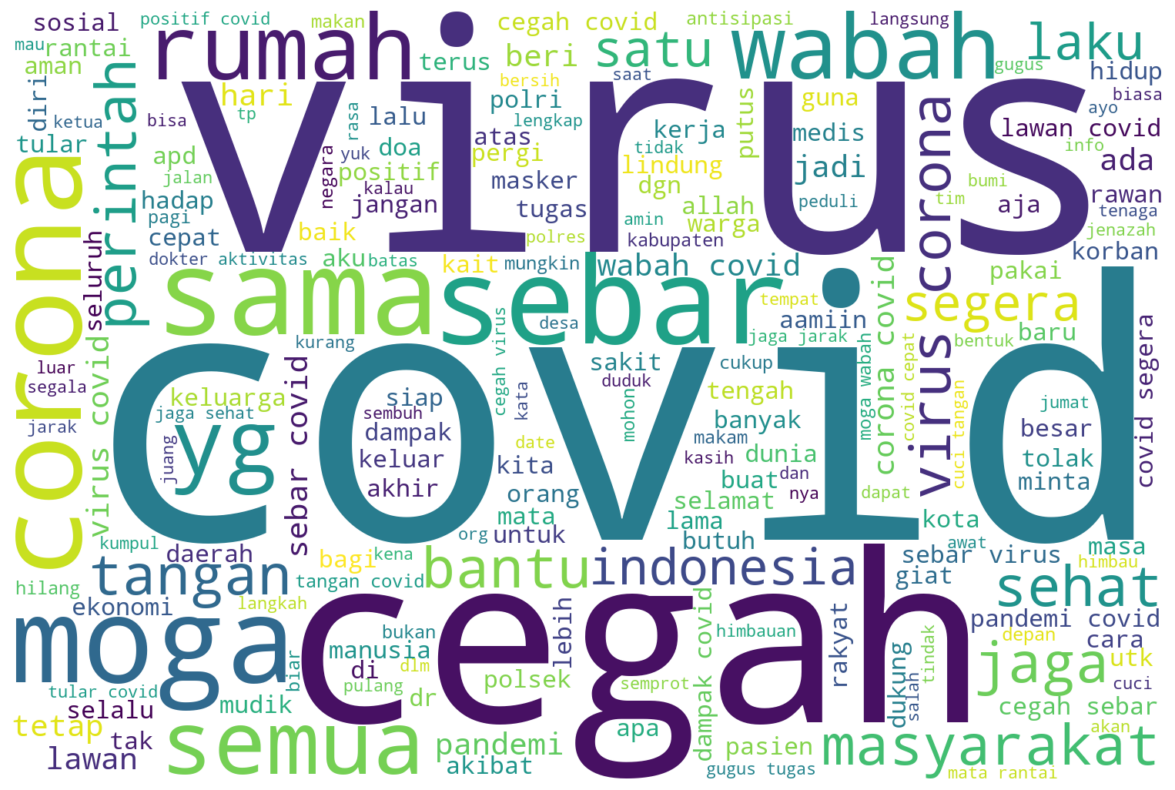

In [26]:
PlotWordCloud(d_pos)

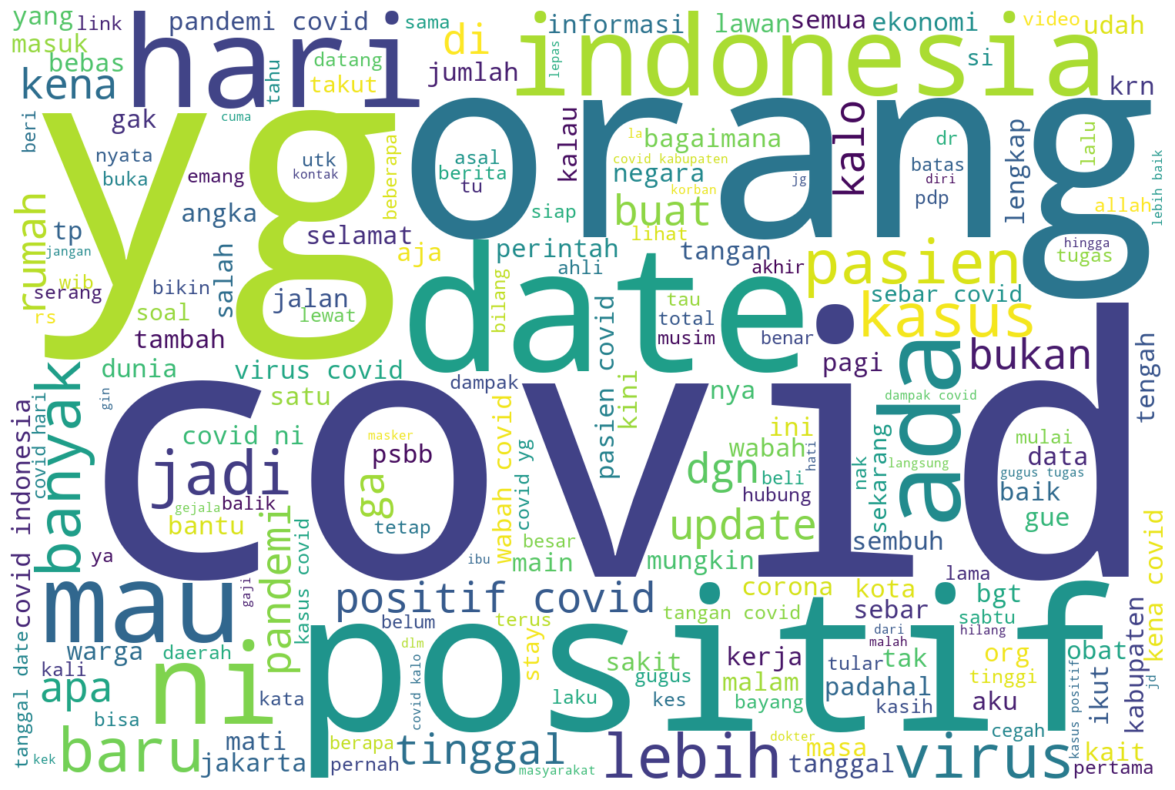

In [27]:
PlotWordCloud(d_neu)

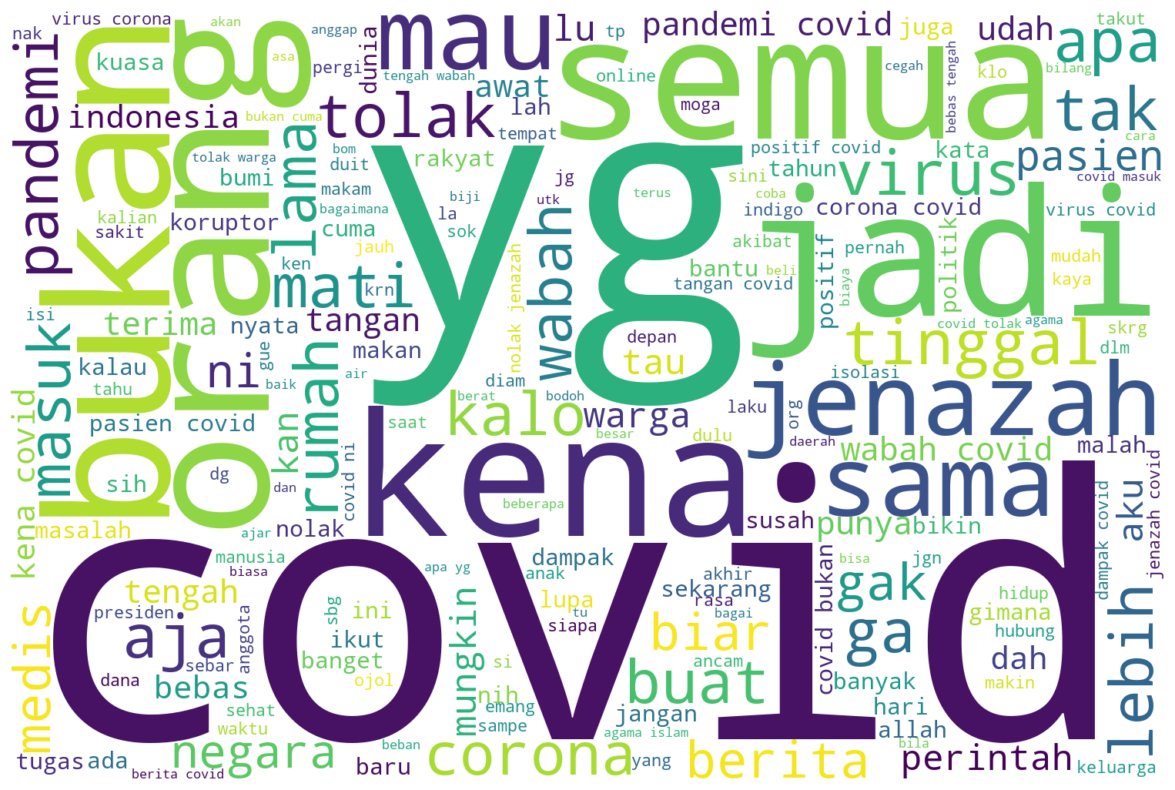

In [28]:
PlotWordCloud(d_neg)